In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/jairo/results_CRAWDAD_full.csv')
display(df)

,aborted,assigned_at,buffer_size,buffertime_avg,buffertime_med,created,delivered,delivery_prob,dropped,exp_weight,...,rtt_med,scenario,seed,sim_time,started,started_at,task_id,ttl,worker,router_fmt
0,14637,2018-04-18T11:46:40.888279,50M,11851.2887,15718,10249,4480,0.4371,39029,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'m',302400,66902,2018-04-18T11:54:37.757982,0,300,asterion,SprayAndWaitRouter
1,14347,2018-04-18T11:46:40.888280,50M,11880.7563,15751,10246,4493,0.4385,39396,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'M',302400,66886,2018-04-18T11:54:37.757983,0,300,asterion,SprayAndWaitRouter
2,14727,2018-04-18T11:46:40.888281,50M,11872.4643,15606,10252,4582,0.4469,38799,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'ms',302400,67180,2018-04-18T11:54:37.757984,0,300,asterion,SprayAndWaitRouter
3,14565,2018-04-18T11:46:40.888282,50M,11903.6060,15766,10245,4415,0.4309,38900,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'mg',302400,66149,2018-04-18T11:54:37.757985,0,300,asterion,SprayAndWaitRouter
4,14621,2018-04-18T11:46:40.888283,50M,11836.5296,15792,10245,4567,0.4458,39017,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'mM',302400,66986,2018-04-18T11:54:37.757986,0,300,asterion,SprayAndWaitRouter
5,14650,2018-04-18T11:46:40.888284,50M,11801.8584,15535,10244,4466,0.4360,38639,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'me',302400,66620,2018-04-18T11:54:37.757987,0,300,asterion,SprayAndWaitRouter
6,14765,2018-04-18T11:46:40.888285,50M,11844.8994,15585,10267,4535,0.4417,39034,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'mE',302400,67277,2018-04-18T11:54:37.757988,0,300,asterion,SprayAndWaitRouter
7,14826,2018-04-18T11:46:40.888286,50M,11840.8067,15685,10245,4529,0.4421,38712,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'sg',302400,66781,2018-04-18T11:54:37.757989,0,300,asterion,SprayAndWaitRouter
8,14790,2018-04-18T11:46:40.888287,50M,11864.0114,15673,10249,4482,0.4373,39076,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'sM',302400,67113,2018-04-18T11:54:37.757990,0,300,asterion,SprayAndWaitRouter
9,14707,2018-04-18T11:46:40.888288,50M,11750.2031,15435,10250,4523,0.4413,38674,0,...,NaN,infocom06_SprayAndWaitRouter_[300]ttl_[302400]...,'se',302400,67021,2018-04-18T11:54:37.757991,0,300,asterion,SprayAndWaitRouter


Text(0,0.5,'Sobrecarga')

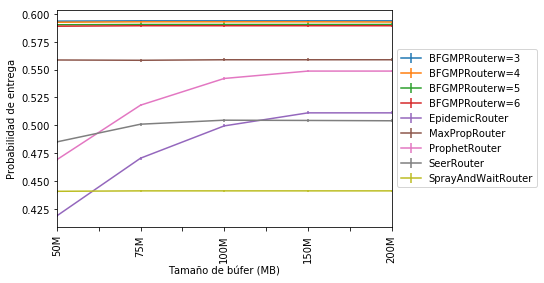

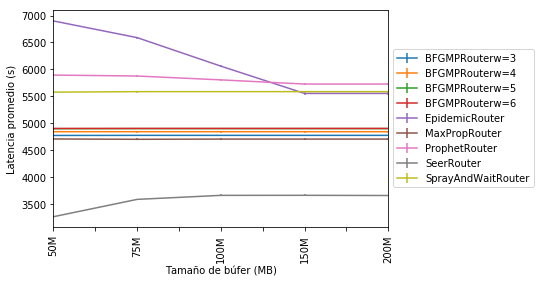

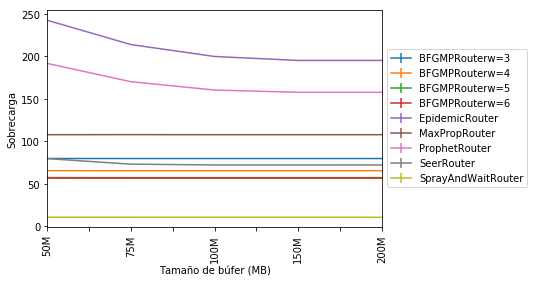

In [15]:
buffer_order = ['50M', '75M', '100M', '150M', '200M']

means = df[df.msg_interval=='25,35'].groupby(by=['buffer_size', 'router_fmt']).mean()
errors = df[df.msg_interval=='25,35'].groupby(by=['buffer_size', 'router_fmt']).sem()*1.96
means = means.unstack()
errors = errors.unstack()

ax = means.loc[buffer_order].plot(rot=90, y='delivery_prob', yerr=errors['delivery_prob'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Tamaño de búfer (MB)')
ax.set_ylabel('Probabilidad de entrega')

ax = means.loc[buffer_order].plot(rot=90, y='latency_avg', yerr=errors['latency_avg'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Tamaño de búfer (MB)')
ax.set_ylabel('Latencia promedio (s)')

ax = means.loc[buffer_order].plot(rot=90, y='overhead_ratio', yerr=errors['overhead_ratio'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Tamaño de búfer (MB)')
ax.set_ylabel('Sobrecarga')


Text(0,0.5,'Sobrecarga')

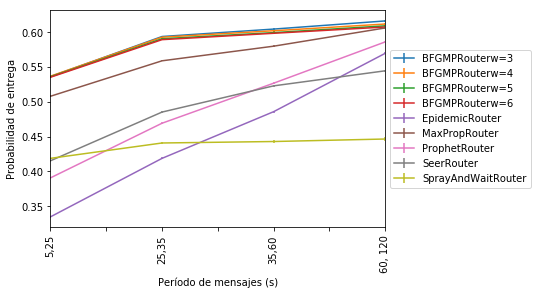

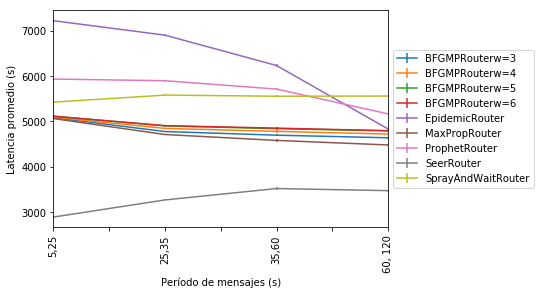

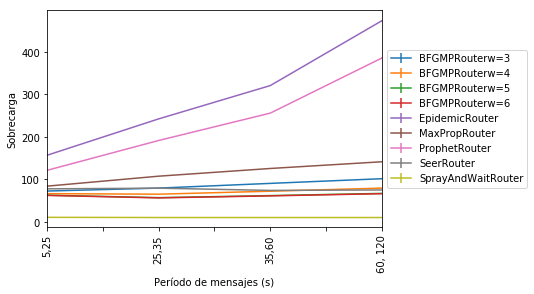

In [18]:
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']
means = df[df.buffer_size=='50M'].groupby(by=['msg_interval', 'router_fmt']).mean()
errors = df[df.buffer_size=='50M'].groupby(by=['msg_interval', 'router_fmt']).sem()*1.96
means = means.unstack()
errors = errors.unstack()

ax = means.loc[x_axis_order].plot(rot=90, y='delivery_prob', yerr=errors['delivery_prob'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Período de mensajes (s)')
ax.set_ylabel('Probabilidad de entrega')

ax = means.loc[x_axis_order].plot(rot=90, y='latency_avg', yerr=errors['latency_avg'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Período de mensajes (s)')
ax.set_ylabel('Latencia promedio (s)')

ax = means.loc[x_axis_order].plot(rot=90, y='overhead_ratio', yerr=errors['overhead_ratio'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Período de mensajes (s)')
ax.set_ylabel('Sobrecarga')